# 6장. 케라스2로 구현하는 AE(오토인코더)
## 6.3 합성곱 계층을 이용한 AE 구현 
이미지 처리에 효과적인 합성곱 계층을 이용한 AE 방식

In [1]:
# set to use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

### 6.3.1 합성곱 AE 모델링
1. 합성곱 계층을 이용하는 AE 신경망의 모델링

In [2]:
from keras import layers, models

In [12]:
def Conv2D(filters, kernel_size, padding='same', activation='relu'):
    return layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)

class AE(models.Model):
    def __init__(self, org_shape=(1, 28, 28)):
        # Input
        original = layers.Input(shape=org_shape)

        # encoding-1
        x = Conv2D(4, (3, 3))(original)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # encoding-2
        x = Conv2D(8, (3, 3))(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # encoding-3: encoding output: 7x7 pixels
        z = Conv2D(1, (7, 7))(x)

        # decoding-1
        y = Conv2D(16, (3, 3))(z)
        y = layers.UpSampling2D((2, 2))(y)

        # decoding-2
        y = Conv2D(8, (3, 3))(y)
        y = layers.UpSampling2D((2, 2))(y)

        # decoding-3
        y = Conv2D(4, (3, 3))(y)

        # decoding & Output
        decoded = Conv2D(1, (3, 3), activation='sigmoid')(y)

        super().__init__(original, decoded)
        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

### 6.3.2 데이터 준비 및 학습 효과 분석 
2. 데이터 준비와 학습 효과 분석

In [13]:
###########################
# 데이타 불러오기
###########################
from ex4_1_cnn_mnist_cl import DATA


###########################
# 학습 효과 분석
###########################
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

### 6.3.3 합성곱 AE 결과 시각화
3. 결과 데이터의 차원을 조정해 합성곱 AE 결과를 시각화

In [14]:
from keras import backend

In [15]:
def show_ae(autoencoder, data):
    x_test = data.x_test
    decoded_imgs = autoencoder.predict(x_test)
    print(decoded_imgs.shape, data.x_test.shape)

    if backend.image_data_format() == 'channels_first':
        N, n_ch, n_i, n_j = x_test.shape
    else:
        N, n_i, n_j, n_ch = x_test.shape

    x_test = x_test.reshape(N, n_i, n_j)
    decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0], n_i, n_j)
    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i], cmap='gray')
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i], cmap='gray')
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

### 6.3.4 합성곱 AE 학습 및 성능 평가 
4. 합성곱 AE 모델링, 데이터 준비, 학습, 결과 시각화 코드를 준비했으니 이제 실제 학습과 성능 평가를 수행

In [16]:
def main(epochs=20, batch_size=128):
    data = DATA()
    autoencoder = AE(data.input_shape)

    history = autoencoder.fit(data.x_train, data.x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_split=0.2)

    plot_acc(history, '(a) 정확도 학습 곡선')
    plt.show()
    plot_loss(history, '(b) 손실 학습 곡선')
    plt.show()

    show_ae(autoencoder, data)
    plt.show()

Epoch 1/20
375/375 [==============================] - 23s 63ms/step - loss: 0.6921 - accuracy: 0.5884 - val_loss: 0.6918 - val_accuracy: 0.6391
Epoch 2/20
375/375 [==============================] - 22s 59ms/step - loss: 0.6913 - accuracy: 0.6770 - val_loss: 0.6908 - val_accuracy: 0.7095
Epoch 3/20
375/375 [==============================] - 24s 63ms/step - loss: 0.6902 - accuracy: 0.7329 - val_loss: 0.6895 - val_accuracy: 0.7524
Epoch 4/20
375/375 [==============================] - 21s 55ms/step - loss: 0.6886 - accuracy: 0.7663 - val_loss: 0.6877 - val_accuracy: 0.7778
Epoch 5/20
375/375 [==============================] - 20s 52ms/step - loss: 0.6866 - accuracy: 0.7857 - val_loss: 0.6852 - val_accuracy: 0.7925
Epoch 6/20
375/375 [==============================] - 19s 52ms/step - loss: 0.6836 - accuracy: 0.7969 - val_loss: 0.6817 - val_accuracy: 0.8012
Epoch 7/20
375/375 [==============================] - 19s 51ms/step - loss: 0.6792 - accuracy: 0.8034 - val_loss: 0.6761 - val_accuracy:

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/ana

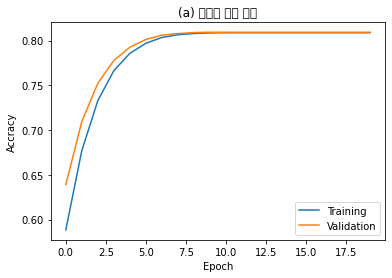

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)


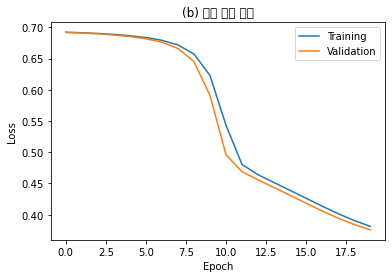

(10000, 28, 28, 1) (10000, 28, 28, 1)


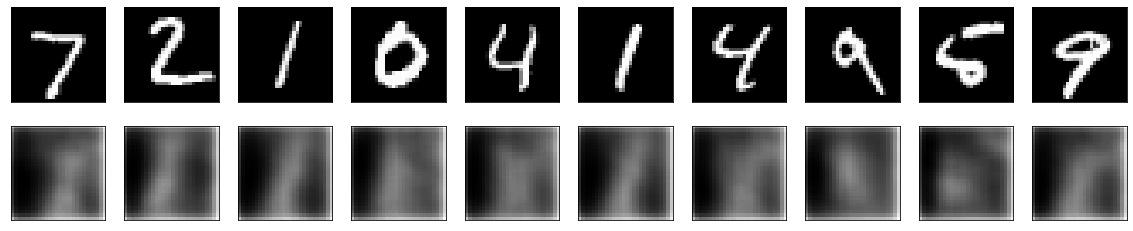

In [17]:
main()

---
### 6.3.5 전체 코드

(60000, 784)
(10000, 784)
Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6938 - accuracy: 0.0010 - val_loss: 0.6938 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6936 - accuracy: 0.0010 - val_loss: 0.6935 - val_accuracy: 0.0012
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6934 - accuracy: 0.0010 - val_loss: 0.6933 - val_accuracy: 0.0012
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.0010 - val_loss: 0.6931 - val_accuracy: 0.0014
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6929 - accuracy: 0.0010 - val_loss: 0.6928 - val_accuracy: 0.0014
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6927 - accuracy: 0.0011 - val_loss: 0.6926 - val_accuracy: 0.0014
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6925 - accuracy: 0.0011 - val_loss: 0.6924 - v

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/ana

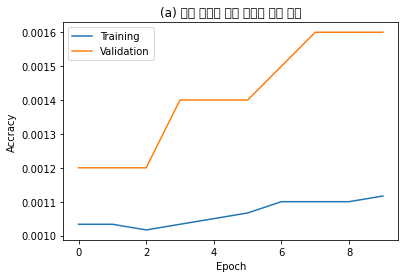

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anacond

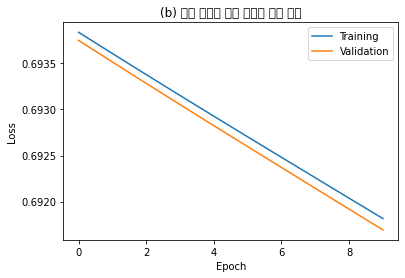

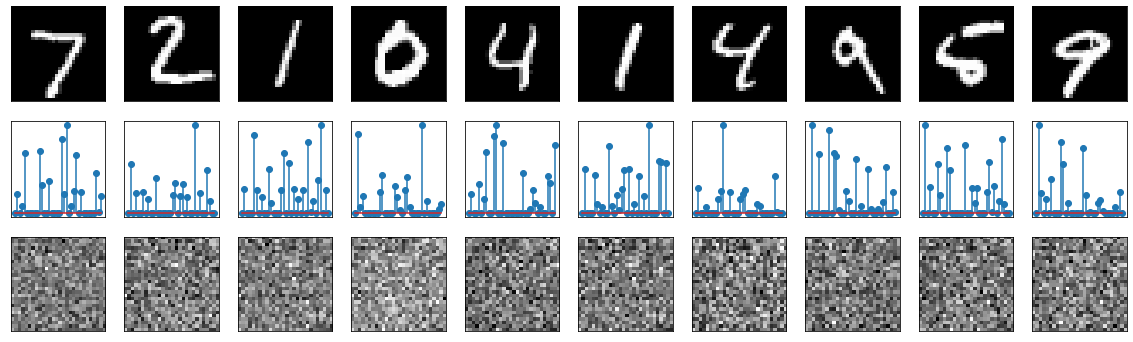

In [11]:
#########################################################
# Convolutional layer based AE with MNIST, Models/Class
#########################################################

###########################
# AE 모델링
###########################
from keras import layers, models

def Conv2D(filters, kernel_size, padding='same', activation='relu'):
    return layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)

class AE(models.Model):
    def __init__(self, org_shape=(1, 28, 28)):
        # Input
        original = layers.Input(shape=org_shape)

        # encoding-1
        x = Conv2D(4, (3, 3))(original)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # encoding-2
        x = Conv2D(8, (3, 3))(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # encoding-3: encoding output: 7x7 pixels
        z = Conv2D(1, (7, 7))(x)

        # decoding-1
        y = Conv2D(16, (3, 3))(z)
        y = layers.UpSampling2D((2, 2))(y)

        # decoding-2
        y = Conv2D(8, (3, 3))(y)
        y = layers.UpSampling2D((2, 2))(y)

        # decoding-3
        y = Conv2D(4, (3, 3))(y)

        # decoding & Output
        decoded = Conv2D(1, (3, 3), activation='sigmoid')(y)

        super().__init__(original, decoded)
        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


###########################
# 데이타 불러오기
###########################
from ex4_1_cnn_mnist_cl import DATA


###########################
# 학습 효과 분석
###########################
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt


###########################
# AE 결과 시각화
###########################
from keras import backend 


def show_ae(autoencoder, data):
    x_test = data.x_test
    decoded_imgs = autoencoder.predict(x_test)
    print(decoded_imgs.shape, data.x_test.shape)

    if backend.image_data_format() == 'channels_first':
        N, n_ch, n_i, n_j = x_test.shape
    else:
        N, n_i, n_j, n_ch = x_test.shape

    x_test = x_test.reshape(N, n_i, n_j)
    decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0], n_i, n_j)
    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i], cmap='gray')
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i], cmap='gray')
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
    

###########################
# 학습 및 확인
###########################
def main(epochs=20, batch_size=128):
    data = DATA()
    autoencoder = AE(data.input_shape)

    history = autoencoder.fit(data.x_train, data.x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_split=0.2)

    plot_acc(history, '(a) 정확도 학습 곡선')
    plt.show()
    plot_loss(history, '(b) 손실 학습 곡선')
    plt.show()

    show_ae(autoencoder, data)
    plt.show()

main()